### Building Linear Regression Model for House Price Prediction Use Case

In [1]:
# Import required libraries

from os.path import join
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Bengaluru House Price Data - https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data/

In [ ]:
# Import the dataset

data_path = "/home/datamaking/work/code/workarea/weekly_online_meeting/1-linear-regression/data"
model_path = "/home/datamaking/work/code/workarea/weekly_online_meeting/1-linear-regression/model"

file_name = "bengaluru_house_price_data.csv"

file_path = join(data_path, file_name)

df = pd.read_csv(file_path)
df_backup = df.copy()

# Display the first few rows of the dataset
df.head()

# y = mX + c
# y = m1X1 + m2X2 + c

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


| Column Name   | Description                                                                 | Example Value             | Notes                                                                 |
|---------------|-----------------------------------------------------------------------------|---------------------------|-----------------------------------------------------------------------|
| `area_type`   | Type of area being measured                                                 | `Super built-up  Area`    | Describes how the area is measured: Super built-up, Built-up, Plot, etc. |
| `availability`| When the property is available for possession                               | `19-Dec`, `Ready To Move` | Indicates possession status. Could be a specific date or ready now.   |
| `location`    | Name of the locality or area in Bengaluru                                   | `Electronic City Phase II`| Some values may be missing (1 missing entry).                         |
| `size`        | Configuration of the property in terms of number of rooms                  | `2 BHK`, `4 Bedroom`      | Indicates how many bedrooms the house has. Mixed formats present.     |
| `society`     | Name of the residential society or community (if any)                       | `Coomee`, `Theanmp`       | Many missing values. May not always be applicable or recorded.        |
| `total_sqft`  | Total area of the property in square feet                                   | `1056`, `2600`, `2100-2850`| Some values are ranges or non-numeric and need cleaning.              |
| `bath`        | Number of bathrooms                                                         | `2.0`, `5.0`              | Float format. Some missing values (~70).                              |
| `balcony`     | Number of balconies                                                         | `1.0`, `3.0`              | Also float format. Missing values (~600).                             |
| `price`       | Price of the property in Lakhs (1 Lakh = 100,000 INR)                       | `39.07`, `120.00`         | Numeric value. Represents price in lakhs INR.                         |


In [3]:
# EDA - Exploratory Data Analysis

print("Dataset Shape:")
print(df.shape)
print("\n Dataset Data Types:")
print(df.dtypes)
print("\n Dataset Columns:")
print(df.columns)

Dataset Shape:
(13320, 9)

 Dataset Data Types:
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

 Dataset Columns:
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [4]:
print("\n Dataset Description:")
print(df.describe())
print("\n Dataset Info:")
df.info()


 Dataset Description:
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null 


 Dataset Missing Values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


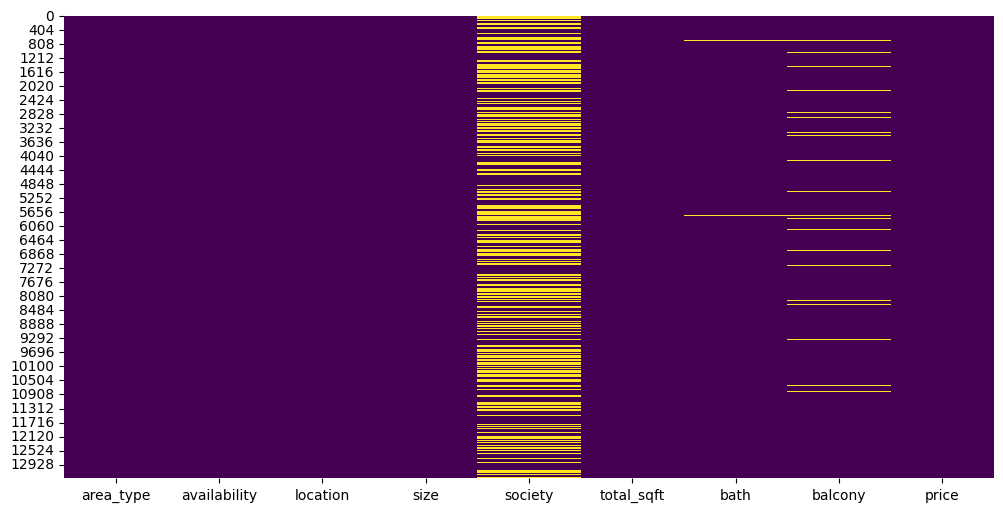

In [5]:
# Check for missing values
print("\n Dataset Missing Values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

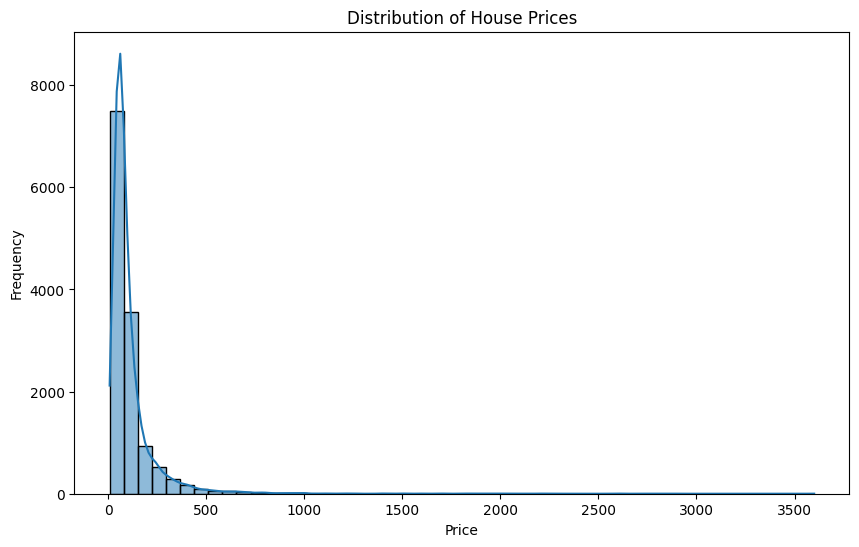

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

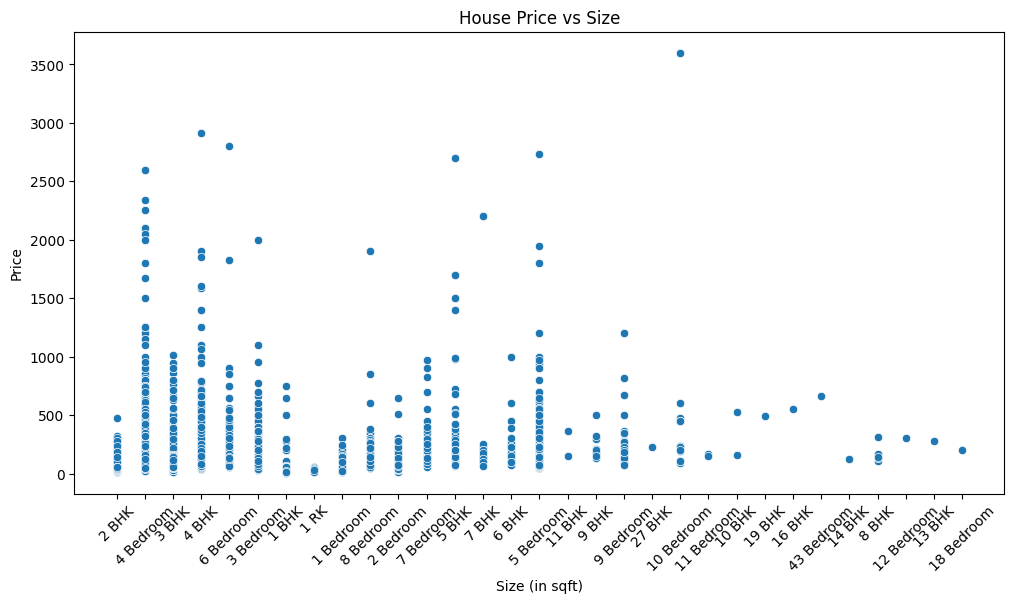

In [7]:
# Check how the price varies with the size of the house and x axis value in slanting position

plt.figure(figsize=(12, 6))
sns.scatterplot(x='size', y='price', data=df)
plt.title('House Price vs Size')
plt.xlabel('Size (in sqft)')
plt.ylabel('Price')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

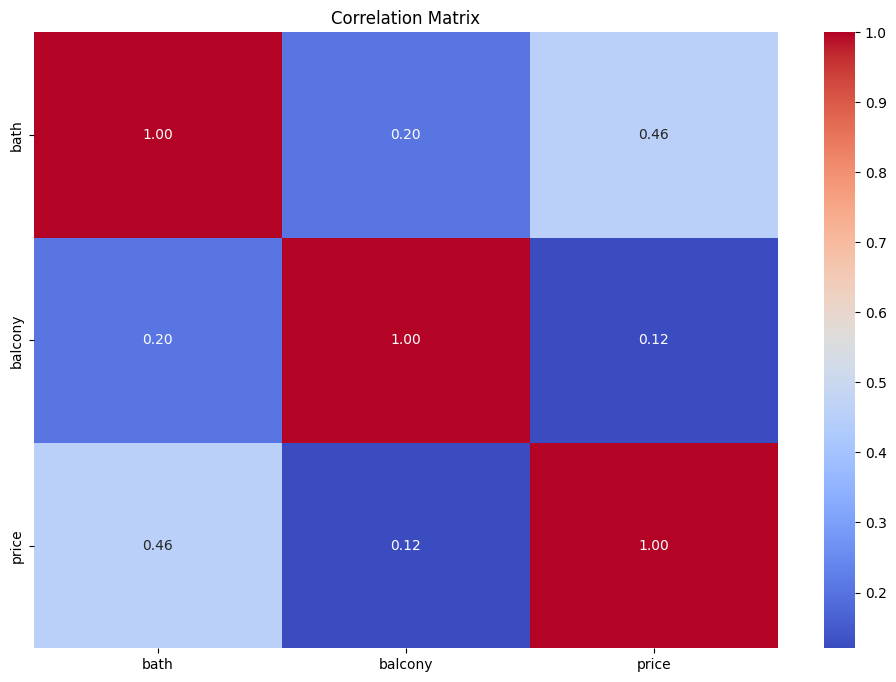

In [8]:
# Create a correlation matrix to understand relationships between numerical features, please ignore the categorical features for now
correlation_matrix = df[["bath", "balcony", "price"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [10]:
# Data Cleaning - Remove unnecessary columns and handle missing values

# Check for missing values
print("\n Dataset Missing Values:")
print(df.isnull().sum())

print("\n Dataset Shape Before Cleaning:")
print(df.shape)

# Check unique values in 'area_type' and 'availability' columns
print("\n Unique values in 'area_type':")
print(df['area_type'].unique())
print(len(df['area_type'].unique()))
print("\n Unique values in 'society':")
print(df['society'].unique())
print(len(df['society'].unique()))
print("\n Unique values in 'availability':")
print(df['availability'].unique())
print(len(df['availability'].unique()))

# Remove unnecessary columns
columns_to_drop = ['area_type', 'society', 'availability']
df.drop(columns=columns_to_drop, inplace=True)


 Dataset Missing Values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

 Dataset Shape Before Cleaning:
(13320, 9)

 Unique values in 'area_type':
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
4

 Unique values in 'society':
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
2689

 Unique values in 'availability':
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr

In [11]:
print(df.dtypes)
print("\n Dataset Shape Before Cleaning:")
print(df.shape)

print(df.isna().sum())

df = df.dropna()
print("\n Dataset Shape After Cleaning:")
print(df.shape)

print("\n Dataset Missing Values After Cleaning:")
df.isna().sum()

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

 Dataset Shape Before Cleaning:
(13320, 6)
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

 Dataset Shape After Cleaning:
(12710, 6)

 Dataset Missing Values After Cleaning:


location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
print(df.dtypes)
print("\n Unique values in 'size':")
print(df['size'].unique())

# Feature Engineering
# Add new feature(integer) for bhk (Bedrooms Hall Kitchen)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
print("\n Unique values in 'bhk':")
print(df['bhk'].unique())

df.drop(columns=['size'], inplace=True)


location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

 Unique values in 'size':
['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 Bedroom' '2 Bedroom' '6 Bedroom' '8 Bedroom' '7 Bedroom' '5 BHK'
 '7 BHK' '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK'
 '11 Bedroom' '43 Bedroom' '14 BHK' '8 BHK' '12 Bedroom' '10 Bedroom'
 '13 BHK']

 Unique values in 'bhk':
[ 2  4  3  1  6  8  7  5 11  9 27 43 14 12 10 13]


In [13]:
print(df.dtypes)
print("\n Unique values in 'total_sqft':")
print(df['total_sqft'].unique())

# Convert 'total_sqft' to numeric, handling non-numeric values
def convert_total_sqft(value):
    try:
        # If the value is a number, return it as float
        return float(value)
    except ValueError:
        # If the value is a range (e.g., '1500-2000'), take the average
        if '-' in value:
            parts = value.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return np.nan  # Return NaN for non-numeric values

df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)
print("\n Unique values in 'total_sqft':")    
print(df['total_sqft'].unique())

# Check the data types of the columns
print("\n Data Types of Columns:") 
print(df.dtypes)

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

 Unique values in 'total_sqft':
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']

 Unique values in 'total_sqft':
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]

 Data Types of Columns:
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object


In [14]:
df.info()

# Check null values after conversion
print("\n Null Values After Conversion:")
print(df.isnull().sum())

df = df.dropna()
print("\n Dataset Shape After Cleaning:")
print(df.shape)

print("\n Dataset Missing Values After Cleaning:")
print(df.isna().sum())
# Information about the dataset after cleaning
print("\n Dataset Info After Cleaning:")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   total_sqft  12668 non-null  float64
 2   bath        12710 non-null  float64
 3   balcony     12710 non-null  float64
 4   price       12710 non-null  float64
 5   bhk         12710 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 695.1+ KB

 Null Values After Conversion:
location       0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

 Dataset Shape After Cleaning:
(12668, 6)

 Dataset Missing Values After Cleaning:
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

 Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count

In [15]:
# Value counts for 'location' column
print("\n Value Counts for 'location':")
print(df['location'].value_counts())

# Value counts for 'bhk' column 
print("\n Value Counts for 'bhk':")
print(df['bhk'].value_counts())

# Value counts for 'total_sqft' column        
print("\n Value Counts for 'total_sqft':")        
print(df['total_sqft'].value_counts())        



 Value Counts for 'location':
location
Whitefield                          513
Sarjapur  Road                      372
Electronic City                     300
Kanakpura Road                      259
Thanisandra                         230
                                   ... 
Jaladarsini Layout                    1
Manganahalli                          1
Housing Board Layout Vijay Nagar      1
Madanayakahalli                       1
Byappanahalli                         1
Name: count, Length: 1259, dtype: int64

 Value Counts for 'bhk':
bhk
2     5471
3     4641
4     1235
1      639
5      295
6      191
7       85
8       67
9       33
11       3
10       3
27       1
43       1
14       1
12       1
13       1
Name: count, dtype: int64

 Value Counts for 'total_sqft':
total_sqft
1200.0    788
1100.0    218
1500.0    198
2400.0    177
600.0     172
         ... 
754.0       1
1989.0      1
1686.0      1
2295.0      1
2024.0      1
Name: count, Length: 1886, dtype: int64


In [16]:
len(df.location.unique())

1259

In [17]:
df.location=df.location.apply(lambda x: x.strip())
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                         514
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     259
Thanisandra                        233
                                  ... 
1st Stage Radha Krishna Layout       1
asha township, off hennur road       1
banashankari stage iii sa            1
basaveshwarnagar                     1
beml layout, basaveshwara nagar      1
Name: location, Length: 1248, dtype: int64

In [18]:
len(location_stats[location_stats<=10])

1013

In [19]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Basapura                           10
Gunjur Palya                       10
Nagappa Reddy Layout               10
Kalkere                            10
1st Block Koramangala              10
                                   ..
1st Stage Radha Krishna Layout      1
asha township, off hennur road      1
banashankari stage iii sa           1
basaveshwarnagar                    1
beml layout, basaveshwara nagar     1
Name: location, Length: 1013, dtype: int64

In [20]:
len(df.location.unique())

1248

In [21]:
df.location=df.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(df.location.unique())

236

In [22]:
df.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


In [23]:
df.describe()

,total_sqft,bath,balcony,price,bhk
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,1511.835167,2.616277,1.585649,105.952648,2.736422
std,1162.097276,1.223882,0.816758,131.813137,1.202643
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.015000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [24]:
df[df.total_sqft/df.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8
70,other,500.0,3.0,2.0,100.0,3
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6


In [25]:
df=df[~(df.total_sqft/df.bhk<300)]
print(df.shape)
print("\n Dataset Shape After Removing Outliers:")
df.head(10)

(12013, 6)

 Dataset Shape After Removing Outliers:


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


In [26]:
# Add new feature called price per square feet

df['price_per_sqft']=df['price']*1000000/df['total_sqft']
df.head()



,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,1.0,51.00,2,42500.000000


In [27]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df=remove_pps_outliers(df)
df.shape

(9852, 7)

In [28]:
df.drop(columns=['price_per_sqft'], inplace=True)
df.shape

(9852, 6)

In [29]:
# Outlier Removal Using Bathrooms Feature

df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [30]:
df[df.bath>10]

,location,total_sqft,bath,balcony,price,bhk
9267,other,5425.0,13.0,0.0,275.0,13


Text(0, 0.5, 'Count')

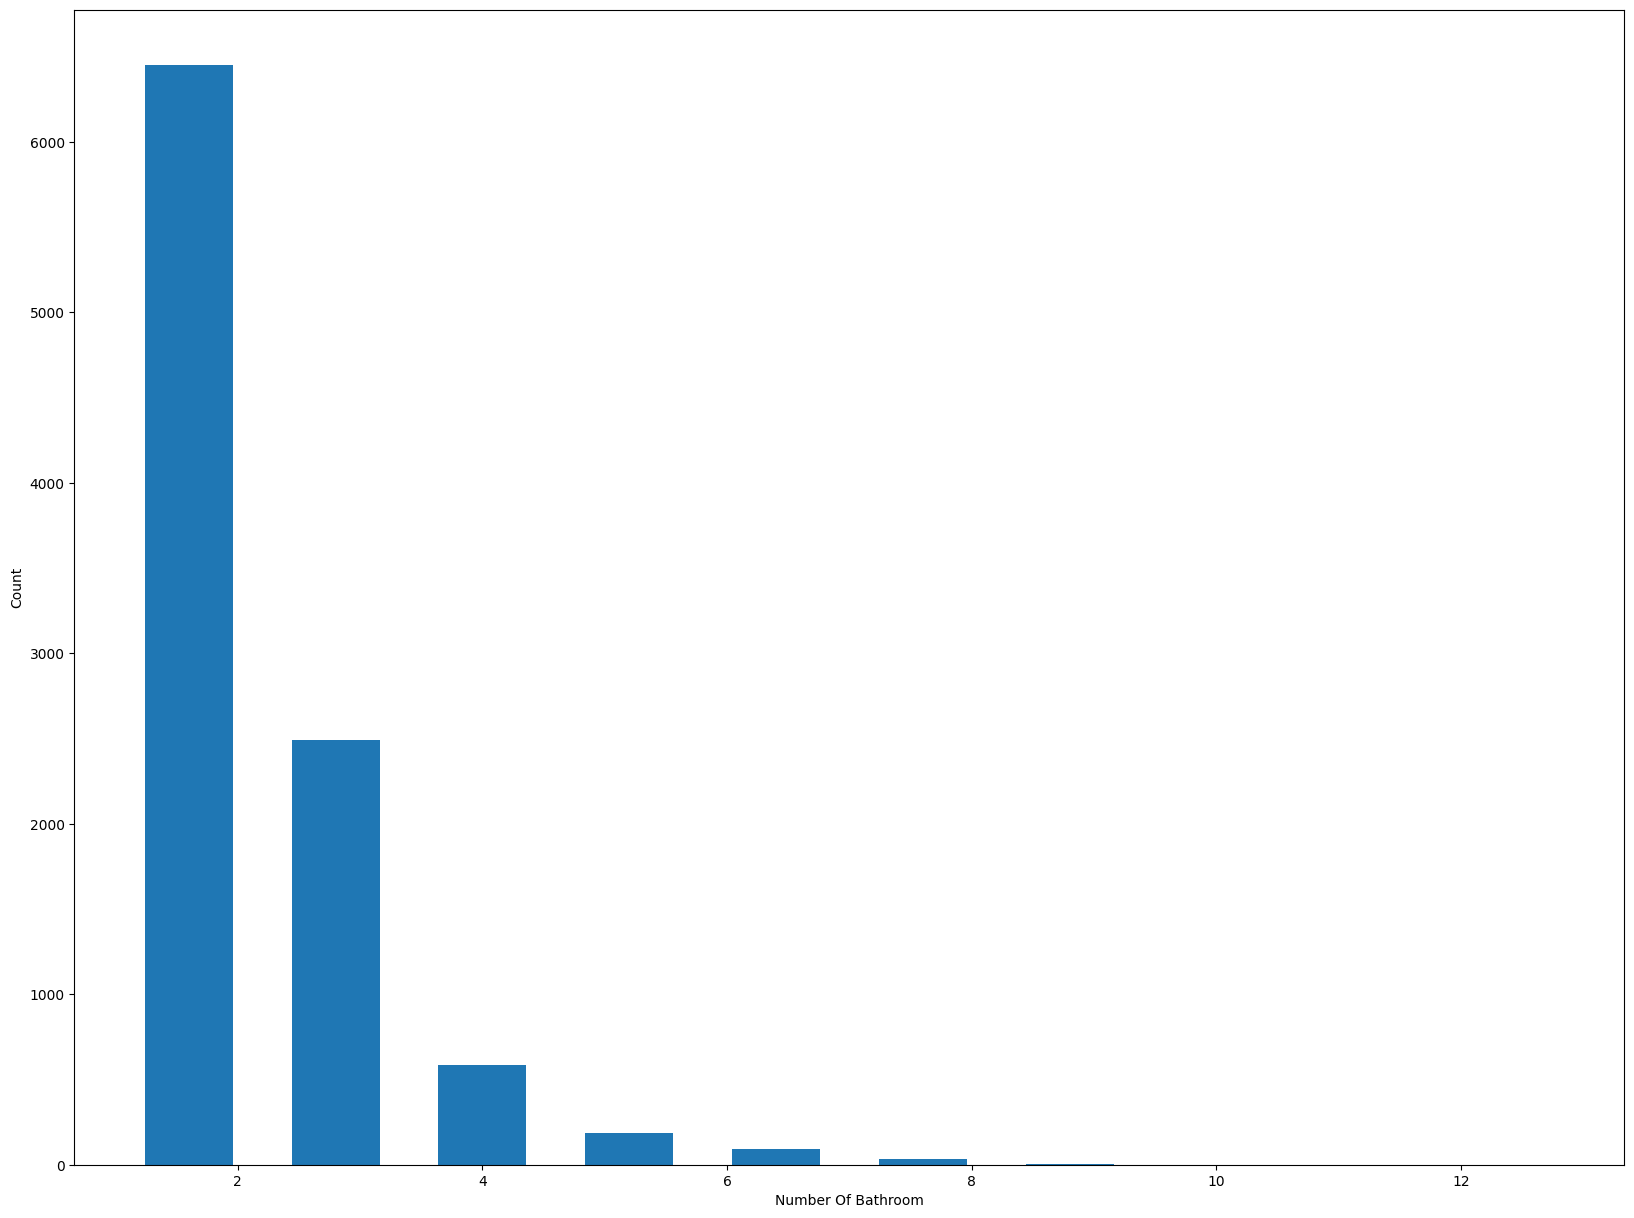

In [31]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [32]:
df[df.bath>df.bhk+2]

,location,total_sqft,bath,balcony,price,bhk
1542,Chikkabanavar,2460.0,7.0,2.0,80.0,4
6443,Thanisandra,1806.0,6.0,2.0,116.0,3
8082,other,11338.0,9.0,1.0,1000.0,6


In [33]:
print(df.dtypes)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['location'], drop_first=True)
# Display the first few rows after encoding
df.head()

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object


,total_sqft,bath,balcony,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df.shape

(9852, 240)

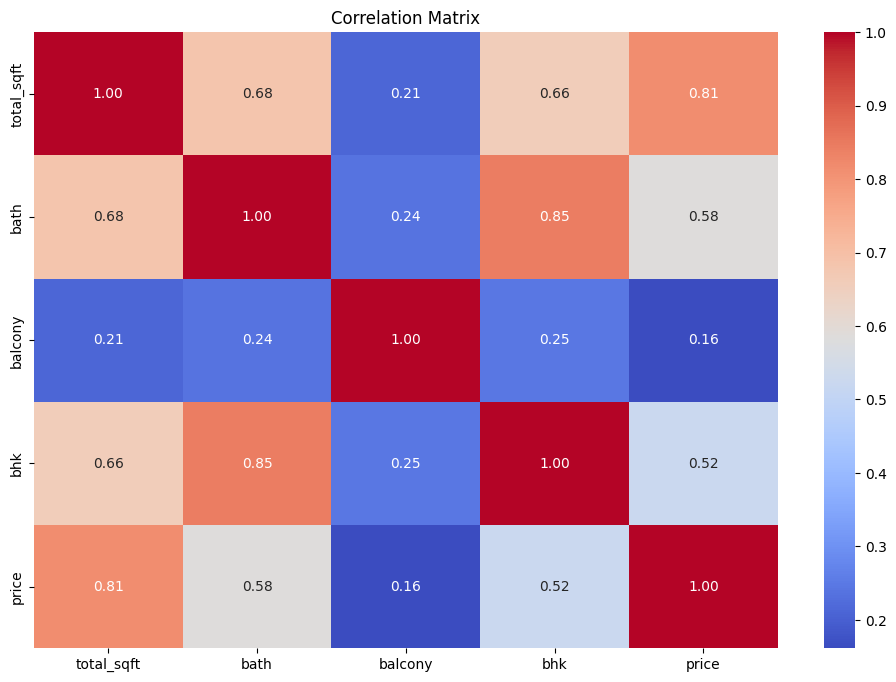

In [35]:
# Create a correlation matrix to understand relationships between numerical features, please ignore the categorical features for now
correlation_matrix = df[['total_sqft', 'bath', 'balcony', 'bhk', "price"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Building Machine Learning Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [37]:
X=df.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
y=df.price

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.7990247505096225

In [41]:
print(X_test.shape)

(1971, 239)


In [ ]:
# Do predictions fot test data and evaluate the model
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7990247505096225

In [43]:
# Find MSE, RMSE, MAE, R2 and Adjusted R2
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"Adjusted R2: {adjusted_r2}")

MSE: 1314.0053410719581
RMSE: 36.249211592418916
MAE: 17.950543235672
R2: 0.7990247505096225
Adjusted R2: 0.7712760014465374


In [44]:
# Save the model using joblib
import joblib
model_file_path = join(model_path, "linear_regression_model.pkl")
joblib.dump(model, model_file_path)
print(f"Model saved to {model_file_path}")

Model saved to /home/datamaking/work/code/workarea/weekly_online_meeting/1-linear-regression/model/linear_regression_model.pkl


In [45]:
# Load the model using joblib and make predictions
loaded_model = joblib.load(model_file_path)
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded.shape)
print("\n")
print("Predictions using loaded model:", y_pred_loaded[:15])

(1971,)


Predictions using loaded model: [ 59.02947115  95.39345094  60.00294841  48.36288253  64.49408764
 286.26422209  88.81519663 134.86976578  71.82868462  45.04887176
  61.99468536  39.53798602  74.60073225  63.81375346  46.96434222]


In [46]:
# Compare predictions from original
print("Original(X):", X_test[:15])
print("\n")
print("Original(y):", y_test[:15])
print("\n")
print("Model Predictions:", y_pred_loaded[:15])
print("\n")

Original(X):       total_sqft  bath  balcony  bhk  location_1st Phase JP Nagar  \
4390      1485.0   2.0      2.0    3                        False   
9016      1500.0   2.0      1.0    2                        False   
9625      1025.0   2.0      1.0    2                        False   
5297      1050.0   2.0      2.0    2                        False   
7083      1255.0   2.0      2.0    2                        False   
4713      2215.0   3.0      2.0    3                        False   
4080      1494.0   3.0      2.0    3                        False   
5975      2100.0   3.0      1.0    3                        False   
8925      1320.0   2.0      3.0    3                        False   
4469      1041.0   2.0      1.0    2                        False   
691       1185.0   2.0      2.0    2                        False   
6616      1090.0   2.0      2.0    2                        False   
205       1605.0   2.0      2.0    3                        False   
5196      1075.0   2.

In [47]:
# Show the difference in predictions
predictions_comparison = pd.DataFrame({
    'Original': y_test,
    'Model Predictions': y_pred_loaded
})
print("\n Predictions Comparison:")
print(predictions_comparison.head(5))

# Display the first few rows of the DataFrame: df based on 
print("\n DataFrame Sample:")
print(df.head(5))


 Predictions Comparison:
      Original  Model Predictions
4390     59.40          59.029471
9016     50.00          95.393451
9625     48.00          60.002948
5297     52.08          48.362883
7083     40.00          64.494088

 DataFrame Sample:
   total_sqft  bath  balcony  price  bhk  location_1st Phase JP Nagar  \
0      2850.0   4.0      1.0  428.0    4                        False   
1      1630.0   3.0      2.0  194.0    3                        False   
2      1875.0   2.0      3.0  235.0    3                        False   
3      1200.0   2.0      0.0  130.0    3                        False   
4      1235.0   2.0      2.0  148.0    2                        False   

   location_2nd Phase Judicial Layout  location_2nd Stage Nagarbhavi  \
0                               False                          False   
1                               False                          False   
2                               False                          False   
3                      

In [48]:
df.loc[
    (df['total_sqft'] == 1550.00) &
    (df['bath'] == 2.0) &
    (df['balcony'] == 1.0) &
    (df['bhk'] == 3)
]

,total_sqft,bath,balcony,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
5937,1550.0,2.0,1.0,89.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8068,1550.0,2.0,1.0,150.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8415,1550.0,2.0,1.0,60.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [49]:
X_train.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=239)

In [50]:
print(loaded_model.feature_names_in_)  # for sklearn >=1.0

['total_sqft' 'bath' 'balcony' 'bhk' 'location_1st Phase JP Nagar'
 'location_2nd Phase Judicial Layout' 'location_2nd Stage Nagarbhavi'
 'location_5th Phase JP Nagar' 'location_6th Phase JP Nagar'
 'location_7th Phase JP Nagar' 'location_8th Phase JP Nagar'
 'location_9th Phase JP Nagar' 'location_AECS Layout' 'location_Abbigere'
 'location_Akshaya Nagar' 'location_Ambalipura' 'location_Ambedkar Nagar'
 'location_Amruthahalli' 'location_Anandapura' 'location_Ananth Nagar'
 'location_Anekal' 'location_Anjanapura' 'location_Ardendale'
 'location_Arekere' 'location_Attibele' 'location_BEML Layout'
 'location_BTM 2nd Stage' 'location_BTM Layout' 'location_Babusapalaya'
 'location_Badavala Nagar' 'location_Balagere' 'location_Banashankari'
 'location_Banashankari Stage II' 'location_Banashankari Stage III'
 'location_Banashankari Stage V' 'location_Banashankari Stage VI'
 'location_Banaswadi' 'location_Banjara Layout' 'location_Bannerghatta'
 'location_Bannerghatta Road' 'location_Basavang

In [51]:
# Create a new DataFrame with the same structure as df
new_data = {
    'total_sqft': [1550.00],
    'bath': [2.0],
    'balcony': [1.0],
    'bhk': [3]
}

for col in loaded_model.feature_names_in_:
    if col not in new_data.keys():
        if col.startswith('location_other'):
            new_data[col] = True
        else:
            new_data[col] = False

new_df = pd.DataFrame(new_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_df)

print("\n Predictions for New Data:")
print(predictions)



 Predictions for New Data:
[91.86063728]


In [52]:
df.iloc[4743, :].to_dict()

{'total_sqft': 1610.0,
 'bath': 3.0,
 'balcony': 1.0,
 'price': 90.0,
 'bhk': 3,
 'location_1st Phase JP Nagar': False,
 'location_2nd Phase Judicial Layout': False,
 'location_2nd Stage Nagarbhavi': False,
 'location_5th Phase JP Nagar': False,
 'location_6th Phase JP Nagar': False,
 'location_7th Phase JP Nagar': False,
 'location_8th Phase JP Nagar': False,
 'location_9th Phase JP Nagar': False,
 'location_AECS Layout': False,
 'location_Abbigere': False,
 'location_Akshaya Nagar': False,
 'location_Ambalipura': False,
 'location_Ambedkar Nagar': False,
 'location_Amruthahalli': False,
 'location_Anandapura': False,
 'location_Ananth Nagar': False,
 'location_Anekal': False,
 'location_Anjanapura': False,
 'location_Ardendale': False,
 'location_Arekere': False,
 'location_Attibele': False,
 'location_BEML Layout': False,
 'location_BTM 2nd Stage': False,
 'location_BTM Layout': False,
 'location_Babusapalaya': False,
 'location_Badavala Nagar': False,
 'location_Balagere': False,
 

In [53]:
df.iloc[4743, :]

total_sqft                     1610.0
bath                              3.0
balcony                           1.0
price                            90.0
bhk                                 3
                                ...  
location_Yelahanka              False
location_Yelahanka New Town     False
location_Yelenahalli            False
location_Yeshwanthpur           False
location_other                  False
Name: 4743, Length: 240, dtype: object

In [54]:
# Create a new DataFrame with the same structure as df
new_data = {
    'total_sqft': [1610.0],
    'bath': [3.0],
    'balcony': [1.0],
    'bhk': [3]
}

for col in loaded_model.feature_names_in_:
    if col not in new_data.keys():
        if col.startswith('location_Marathahalli'):
            new_data[col] = True
        else:
            new_data[col] = False

new_df = pd.DataFrame(new_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_df)

print("\n Predictions for New Data:")
print(predictions)



 Predictions for New Data:
[94.90837815]
